In [1]:
# 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기
# 결측치(missing data)는 누락된 값, 비어 있는 값을 의미함

import pandas as pd
import numpy as np

df = pd.DataFrame({'sex':['M','F',np.nan,'M','F'],
                  'score' : [5,4,3,4,np.nan]})
df


,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
df['score'] +1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [3]:
# pd.isna()를 이용하여 데이터에 결측치가 있는지 확인하기
# 결측치는 True로 나옴

pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [5]:
# df.dropna()를 이용해서 결측치가 있는 행 제거하기

df.dropna(subset=['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [6]:
df_nomiss = df.dropna(subset=['score','sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [7]:
# 모든 변수에 결측치 없는 데이터 추출
# 분석 의도에 따라 분석에 사용할 수 있는 데이터까지 제거될 수 있기 때문에 변수를 직접 지정해서 결측치를 제거하는게 좋음
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [8]:
# mean(),sum(),groupby(),agg() 모두 알아서 결측치를 제거하고 연산함
# 결측치를 모르고 데이터를 다루면 위험하기 때문에 꼭 직접 확인하고 명시적으로 제거하기
df['score'].mean()

4.0

In [9]:
df['score'].sum()

16.0

In [10]:
# 결측치 대체법(imputation)
# 평균값이나 최빈값 같은 대표값을 구해 모든 결측치를 하나의 값으로 일괄 대체하는 방법


In [11]:
exam = pd.read_csv('exam.csv')
exam.loc[[2,7,14],['math']] = np.nan #2,7,14 행의 math에 NaN 할당
exam


,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [12]:
exam['math'].mean()

55.23529411764706

In [13]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [14]:
exam['math'].isna().sum()

0

In [15]:
#mini quiz
mpg = pd.read_csv('mpg.csv')

mpg.loc[[64,123,130,152,211],"hwy"] = np.nan

In [34]:
mpg[['drv','hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

In [32]:
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy = ('hwy','mean'))


,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


In [35]:
#이상치 정제하기
#정상 범위에서 크게 벗어난 값을 이상치(anomaly)라고 함

df = pd.DataFrame({'sex':[1,2,1,3,2,1], 'score':[5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [36]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [38]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [39]:
#np.where()을 이용해서 이상치를 결측치로 바꾸기

#sex가 3이면 NaN을 넣음
df['sex']=np.where(df['sex']==3,np.nan,df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [40]:
#score가 5보다 크면 NaN부여
df['score'] = np.where(df['score']>5,np.nan,df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [41]:
df.dropna(subset = ['sex','score']).groupby('sex').agg(mean_score = ('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [42]:
# np.where()로 반환하는 값 중에 문자가 있으면 np.nan을 지정해도 NaN이 아니라 문자 nan이 반환됨

df=pd.DataFrame({'x1' : [1,1,2,2]})
df['x2'] = np.where(df['x1']==1,'a',np.nan)
df['x2'] = np.where(df['x1']==1,'a','etc')
df['x2']=df['x2'].replace('etc',np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [43]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


<AxesSubplot:ylabel='hwy'>

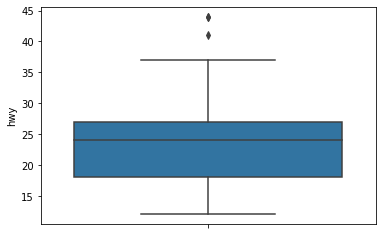

In [44]:
# 극단치(outlier) 제거하기
# 1. 논리적으로 판단해서 정하기 / 2. 상하위 0.3% +-3표준편차에 해당하는 거로 정하기

#boxplot을 이용하여 극단치 판별하기

mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [45]:
# 극단치 기준값 구하기

## 1사분위수, 3 사분위수 구하기
## df.quantile()을 이용하여 분위수(quantile)구하기

pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [46]:
pct75 = mpg['hwy'].quantile(.75)
pct75


27.0

In [47]:
## IQR(inter quarile range, 사분위범위) 구하기
iqr = pct75-pct25
iqr

9.0

In [48]:
## 극단치의 경계가 되는 하한과 상한 구하기
## 하한 : 1사분위수보다 iqr의 1.5배 만큼 더 작은 값
## 상한 : 3사분위수보다 iqr의 1.5배 만큼 더 큰 값

#하한
pct25 - 1.5 * iqr

4.5

In [49]:
# 상한
pct75 + 1.5 * iqr

40.5

In [50]:
# 극단치를 결측 처리하기
mpg['hwy'] = np.where((mpg['hwy']<4.5) | (mpg['hwy']>40.5), np.nan, mpg['hwy'])
mpg['hwy'].isna().sum()

3

In [51]:
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [59]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[9,13,57,92], 'drv'] = 'k'
mpg.loc[[28,42,128,202],'cty'] = [3,4,39,42]



In [60]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

In [61]:
mpg['drv'] = np.where(mpg['drv'].isin(['4','f','r']),mpg['drv'],np.nan)

In [62]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

<AxesSubplot:ylabel='cty'>

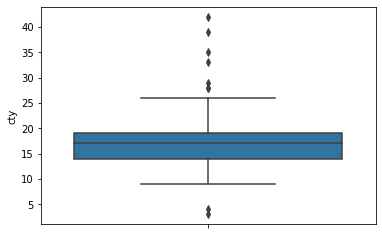

In [55]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'cty')

In [64]:
pct25 = mpg['cty'].quantile(.25)
pct75 = mpg['cty'].quantile(.75)
iqr = pct75-pct25
pct25 - 1.5*iqr

6.5

In [65]:
pct75+1.5*iqr

26.5

In [67]:
mpg['cty']=np.where((mpg['cty']<6.5)|(mpg['cty']>26.5), np.nan, mpg['cty'])
mpg['cty']

0      18.0
1      21.0
2      20.0
3      21.0
4      16.0
       ... 
229    19.0
230    21.0
231    16.0
232    18.0
233    17.0
Name: cty, Length: 234, dtype: float64